# 3.3 Validation of Clustering

<div style="text-align:justify">
Based on the training and testing of the clustering algorithms in Jupyter Notebooks 3.0 and 3.1 the best performing algorithm is selected to be validated with unseen data. <br>
For this reason, steps 1 to 7 from the clustering_model.py DataPreprocessing class are applied to the data to preprocess the data with the trained Normalisation and Standardisation methods as well as the dimensionality reduction method.The resulting clusters are calculated by loading the pretrained clustering algorithm.
</div>

In [1]:
import numpy as np
import pandas as pd
import joblib
from clustering_model import DataPreprocessing as DP
from clustering_model import Clustering


In [2]:
# Load model
path_scaler1 = "C:/Users/a00546973/Desktop/MasterGENIUS/Models/robust_scaler_GHS2002_2.pkl" 
path_scaler2 = "C:/Users/a00546973/Desktop/MasterGENIUS/Models/MMRM_scaler_GHS2002_2.pkl"

pca_path = "C:/Users/a00546973/Desktop/MasterGENIUS/Models/pca_model_file_GHS2002_2-9.pkl"
pca_gmm_path = "C:/Users/a00546973/Desktop/MasterGENIUS/Models/GMM_pca_GHS2002_2-92.pkl"

In [3]:
#Provide validation database path
test_file_path1 = "C:/Users/a00546973/Desktop/Database/I2_ValidationDatabase.csv"

46
46
454.42
7 steps executed.
Model loaded...
Cluster  score_mean  
0        -1189.670760    164044
1        -16.088635       91703
Name: count, dtype: int64


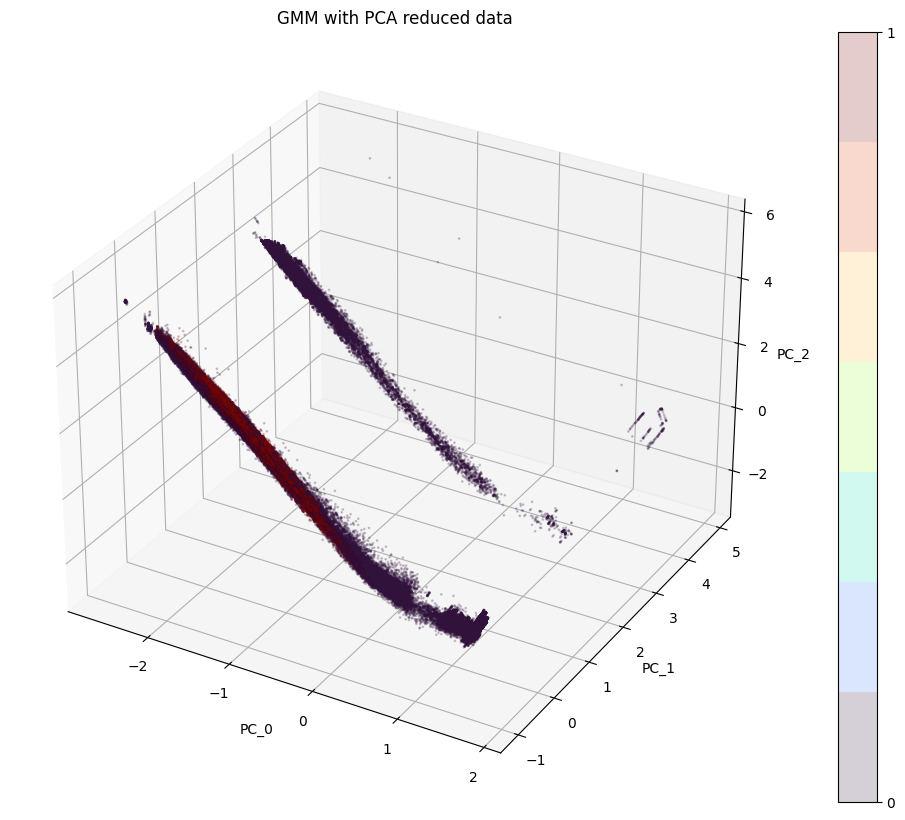

Clustering applied...


c:\Users\a00546973\Desktop\MasterGENIUS\Code\clustering_model.py:807: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"SnCode"] = self.processed_data["SnCode"]
c:\Users\a00546973\Desktop\MasterGENIUS\Code\clustering_model.py:809: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"Cluster"] = self.clustering_data["Cluster"]


         Validate
Cluster          
0           64.14
1           35.86


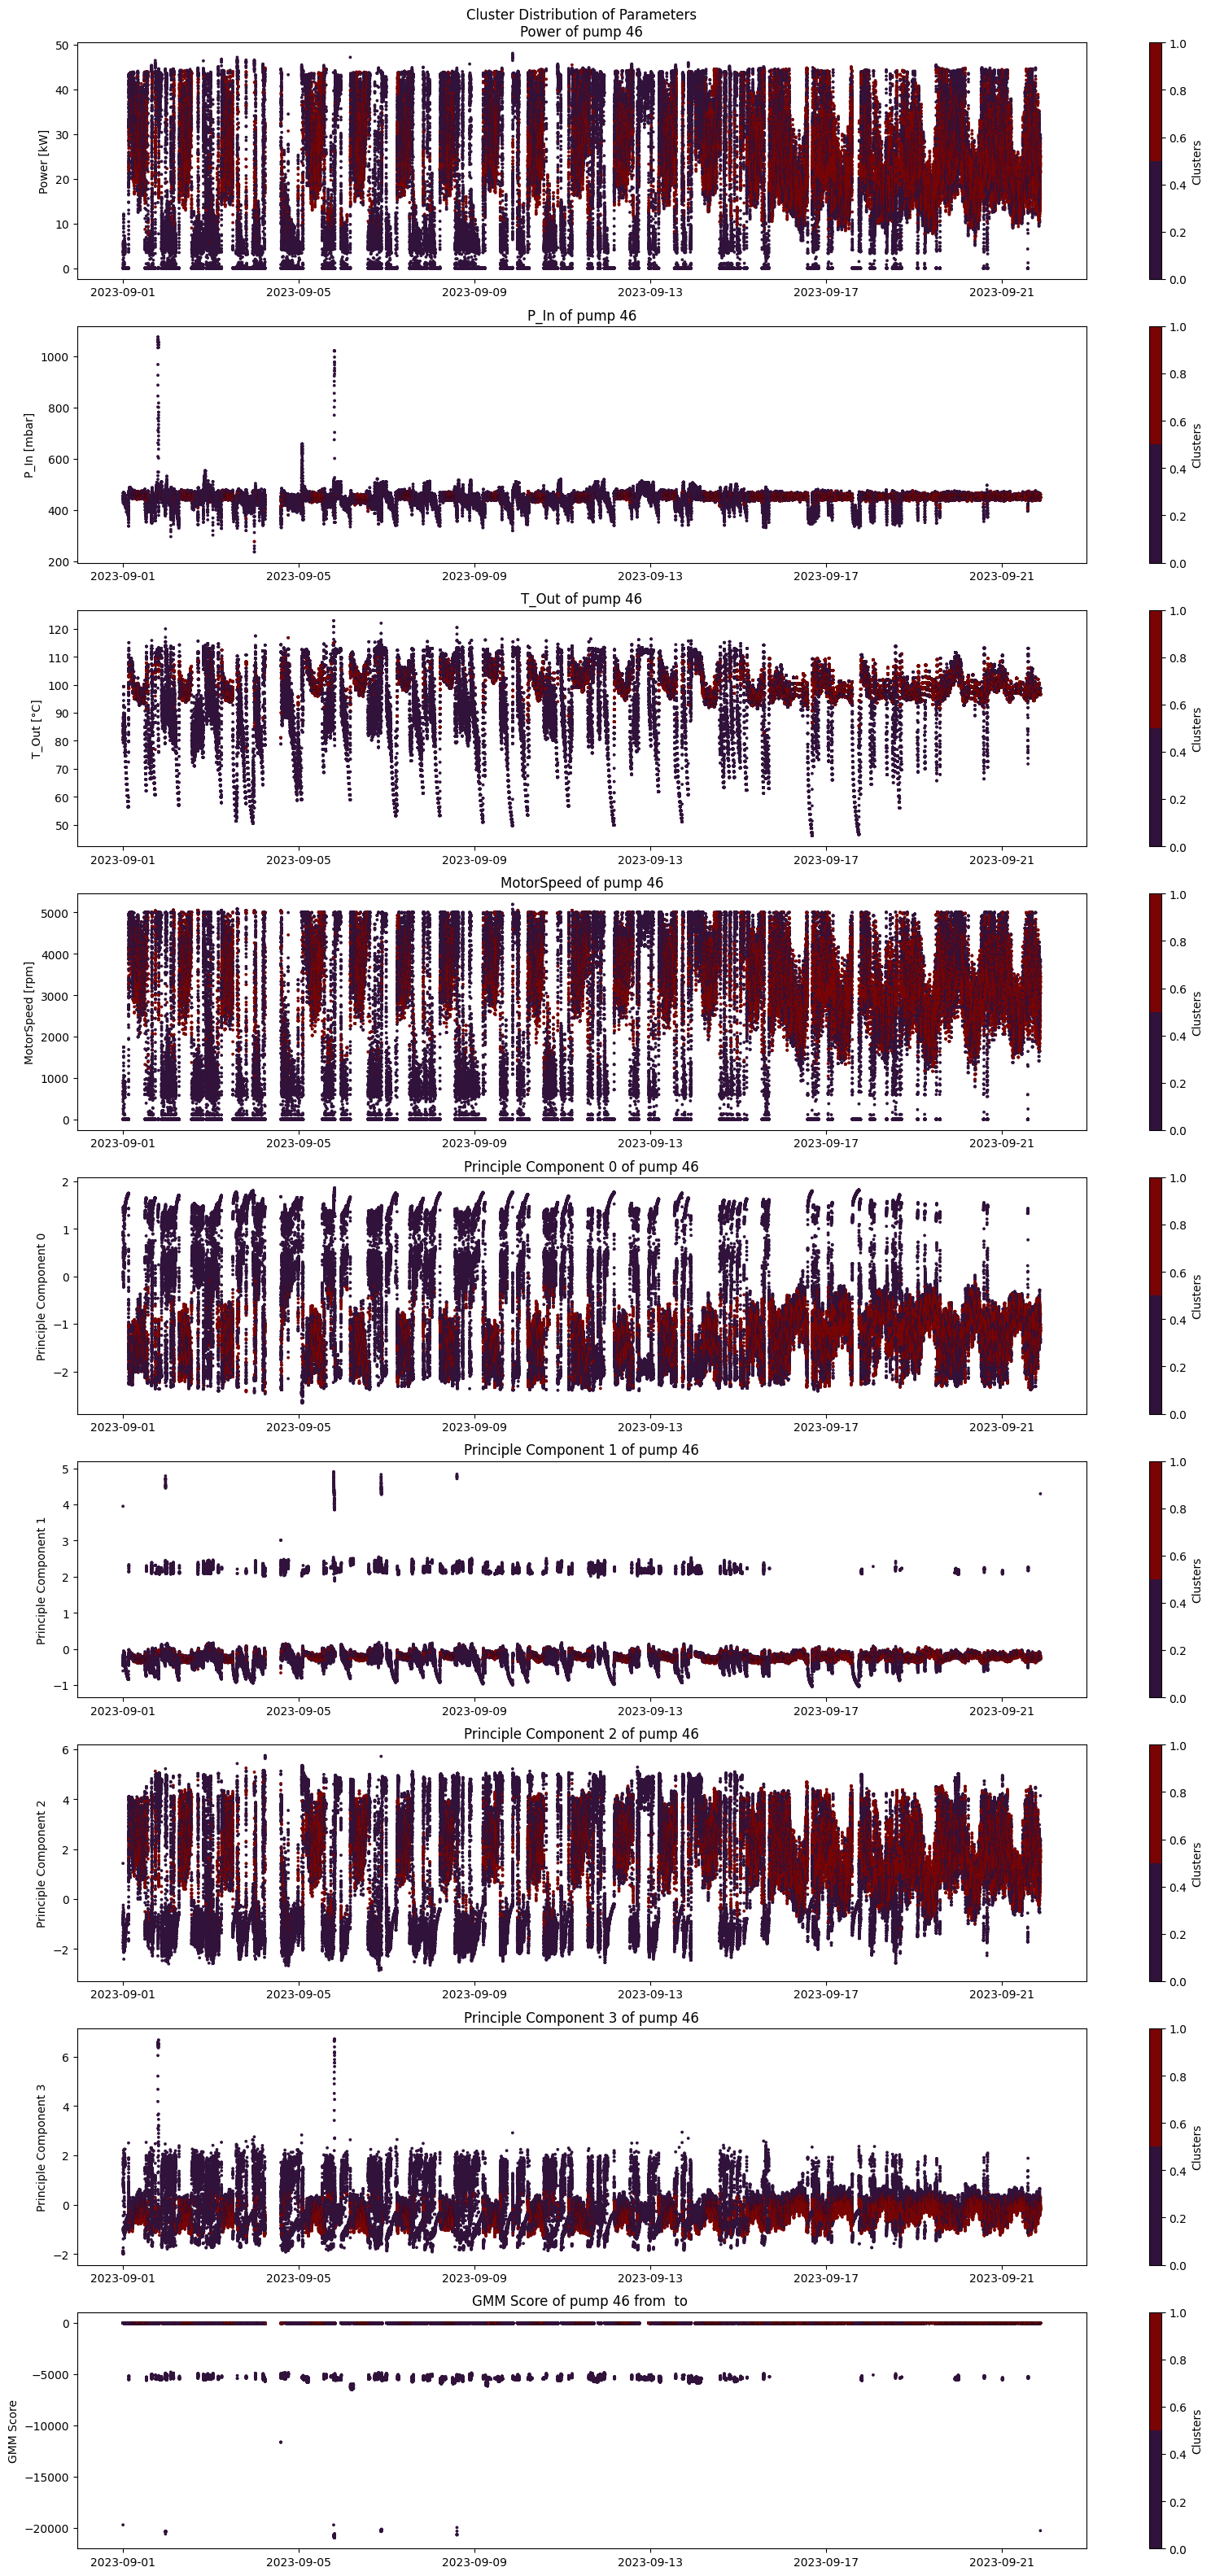

Graphs plotted.


In [4]:
# Run Preprocessing and clustering with pretrained algorithms.
validation = DP(test_file_path1, 9)
validation.execute_preprocessing(path_scaler1, path_scaler2, pca_path)
pca_data = validation.pca_data
processed_data = validation.processed_data

val_clustering = Clustering(pca_gmm_path,1, pca_data, processed_data)
val_clustering.execute_clustering()

In [5]:
processed_data[["SnCode","Cluster"]].value_counts()

SnCode  Cluster
46      0          164044
        1           91703
Name: count, dtype: int64

In [6]:
processed_data[["SnCode"]].value_counts()

SnCode
46        255747
Name: count, dtype: int64

In [7]:
processed_data[["Alert","SnCode","Cluster"]].value_counts()

Alert  SnCode  Cluster
0.0    46      0          129660
               1           91703
2.0    46      0           34226
4.0    46      0             155
3.0    46      0               3
Name: count, dtype: int64